In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/training.csv', encoding='latin-1', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

Mounted at /content/drive


In [ ]:
import pandas as pd
import re

Preprocessing

In [ ]:

df['text'].dropna(inplace=True)
df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
df['text'] = df['text'].apply(lambda x: re.sub(r'[^A-Za-z\s]+', '', x))

df['text'] = df['text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot a thats a bummer you shoulda got da...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...


In [ ]:
df = df.drop(['date', 'flag','user'], axis=1)
df.head()

,target,ids,text
0,0,1467810369,switchfoot a thats a bummer you shoulda got da...
1,0,1467810672,is upset that he cant update his facebook by t...
2,0,1467810917,kenichan i dived many times for the ball manag...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,nationwideclass no its not behaving at all im ...


In [ ]:
import random
import string

special_characters = ['¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª',' ', '«', '¬', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿',
                      'Ā', 'ā', 'Ă', 'ă', 'Ą', 'ą', 'Ć', 'ć', 'Ĉ', 'ĉ', 'Ċ', 'ċ', 'Č', 'č', 'Ď', 'ď', 'Đ', 'đ', 'Ē', 'ē', 'Ĕ', 'ĕ', 'Ė', 'ė', 'Ę', 'ę', 'Ě', 'ě', 'Ĝ', 'ĝ', 'Ğ', 'ğ',
                      'Ġ', 'ġ', 'Ģ', 'ģ', 'Ĥ', 'ĥ', 'Ħ', 'ħ', 'Ĩ', 'ĩ', 'Ī', 'ī', 'Ĭ', 'ĭ', 'Į', 'į', 'İ', 'ı', 'Ĳ', 'ĳ', 'Ĵ', 'ĵ', 'Ķ', 'ķ', 'ĸ', 'Ĺ', 'ĺ', 'Ļ', 'ļ', 'Ľ', 'ľ', 'Ŀ', 'ŀ',
                      'Ł', 'ł', 'Ń', 'ń', 'Ņ', 'ņ', 'Ň', 'ň', 'ŉ', 'Ŋ', 'ŋ', 'Ō', 'ō', 'Ŏ', 'ŏ', 'Ő', 'ő', 'Œ', 'œ', 'Ŕ', 'ŕ', 'Ŗ', 'ŗ', 'Ř', 'ř', 'Ś', 'ś', 'Ŝ', 'ŝ', 'Ş', 'ş', 'Š', 'š',
                      'Ţ', 'ţ', 'Ť', 'ť', 'Ŧ', 'ŧ', 'Ũ', 'ũ', 'Ū', 'ū', 'Ŭ', 'ŭ', 'Ů', 'ů', 'Ű', 'ű', 'Ų', 'ų', 'Ŵ', 'ŵ', 'Ŷ', 'ŷ', 'Ÿ', 'Ź', 'ź', 'Ż', 'ż', 'Ž', 'ž',
                      'Ͱ', 'ͱ', 'Ͳ', 'ͳ', 'ʹ', '͵', 'Ͷ', 'ͷ', 'ͺ', 'ͻ', 'ͼ', 'ͽ', ';', 'Ϳ', 'Ά', '·', 'Έ', 'Ή', 'Ί', 'Ό', 'Ύ', 'Ώ', 'ΐ', 'Α', 'Β', 'Γ', 'Δ', 'Ε', 'Ζ', 'Η', 'Θ', 'Ι',
                      'Κ', 'Λ', 'Μ', 'Ν', 'Ξ', 'Ο', 'Π', 'Ρ', 'Σ', 'Τ', 'Υ', 'Φ', 'Χ', 'Ψ', 'Ω', 'Ϊ', 'Ϋ', 'ά', 'έ', 'ή', 'ί', 'ΰ', 'α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ', 'λ',
                      'μ', 'ν', 'ξ', 'ο', 'π', 'ρ', 'ς', 'σ', 'τ', 'υ', 'φ', 'χ', 'ψ', 'ω', 'ϊ', 'ϋ', 'ό', 'ύ', 'ώ', 'Ϗ', 'ϐ', 'ϑ', 'ϒ', 'ϓ', 'ϔ', 'ϕ', 'ϖ', 'ϗ', 'Ϙ', 'ϙ', 'Ϛ', 'ϛ',
                      'Ϝ', 'ϝ', 'Ϟ', 'ϟ', 'Ϡ', 'ϡ', 'Ϣ', 'ϣ', 'Ϥ', 'ϥ', 'Ϧ', 'ϧ', 'Ϩ', 'ϩ', 'Ϫ', 'ϫ', 'Ϭ', 'ϭ', 'Ϯ', 'ϯ',
                      'А', 'В', 'Е', 'К', 'М', 'Н', 'О', 'Р', 'С', 'Т', 'У', 'Х', 'а', 'в', 'е', 'к', 'м', 'н', 'о', 'р', 'с', 'т', 'у', 'х']

homoglyphs = {
    'A': ['Α', 'А', 'Ꭺ', 'ᗅ', 'ᴀ','Λ'],
    'B': ['Β', 'В', 'ß', '฿'],
    'C': ['Ϲ', 'С', 'Ⲥ', 'Ͼ'],
    'E': ['Ε', 'Е', 'ⴹ', 'ᴇ'],
    'H': ['Η', 'Н', 'Ⲏ', 'ɦ'],
    'I': ['Ι', 'І', 'Ⅰ', '1'],
    'J': ['Ј', 'ϳ', 'Ɉ'],
    'K': ['Κ', 'К', 'Ⲕ', 'ᛕ'],
    'M': ['Μ', 'М', 'Ⲙ', '𐓑'],
    'N': ['Ν', 'Ⲛ', '⋒','Ń', 'Ņ', 'Ň'],
    'O': ['Ο', 'О', 'Ⲟ', '0','Ō', 'ō', 'Ŏ', 'ŏ', 'Ő', 'ő'],
    'P': ['Ρ', 'Р', 'Ⲣ', 'Ꮲ'],
    'S': ['Ѕ', 'Ⲥ', '𐑈'],
    'T': ['Τ', 'Т', 'Ⲧ', '⟙'],
    'X': ['Χ', 'Х', 'Ⲭ', '𐍇','χ'],
    'Y': ['Υ', 'У', 'Ү', 'Ӯ'],
    'a': ['а', 'ɑ', 'ạ', 'ạ'],
    'b': ['Ƅ', 'ь', 'ƅ'],
    'c': ['с', 'ƈ'],
    'd': ['ԁ', 'ɗ'],
    'e': ['е', 'ə'],
    'g': ['ɡ'],
    'h': ['һ'],
    'i': ['і', 'ɩ'],
    'j': ['ј'],
    'k': ['κ'],
    'l': ['ӏ'],
    'm': ['м'],
    'n': ['ո', 'ń','ņ','ň', 'ŉ', 'Ŋ', 'ŋ','Π'],
    'o': ['о', 'ɵ'],
    'p': ['р'],
    's': ['ѕ','Ś', 'ś', 'Ŝ', 'ŝ', 'Ş', 'ş', 'Š', 'š'],
    't': ['т'],
    'u': ['υ'],
    'v': ['ν'],
    'w': ['ѡ','Ϣ', 'ϣ','Ψ'],
    'x': ['х'],
    'y': ['у'],
    'z': ['ᴢ']
}

# Function to add special characters randomly
def add_special_characters(text, noise_level=0.1):
    chars = list(text)
    num_chars = len(chars)
    num_noise_chars = int(noise_level * num_chars)
    for _ in range(num_noise_chars):
        idx = random.randint(0, num_chars - 1)
        chars.insert(idx, random.choice(special_characters))
    return ''.join(chars)

# Function to replace characters with homoglyphs
def replace_with_homoglyphs(text, noise_level=0.1):
    chars = list(text)
    num_chars = len(chars)
    num_replacements = int(noise_level * num_chars)
    for _ in range(num_replacements):
        idx = random.randint(0, num_chars - 1)
        if chars[idx] in homoglyphs:
            chars[idx] = random.choice(homoglyphs[chars[idx]])
    return ''.join(chars)


# Function to replace characters in the text with random alphabetic characters
def replace_with_random_chars(text, noise_level=0.1):
    chars = list(text)
    num_chars = len(chars)
    num_replacements = int(noise_level * num_chars)
    for _ in range(num_replacements):
        idx = random.randint(0, num_chars - 1)
        chars[idx] = random.choice(string.ascii_letters)
    return ''.join(chars)

# Example usage
original_text = "Example text to be modified."
noisy_text_with_random_chars = replace_with_random_chars(original_text, noise_level=0.1)

print("Original Text:", original_text)
print("Noisy Text with Random Characters:", noisy_text_with_random_chars)


# Example usage
original_text = "Example text to be modified."
noisy_text_with_special_chars = add_special_characters(original_text, noise_level=0.2)
noisy_text_with_homoglyphs = replace_with_homoglyphs(original_text, noise_level=0.8)

print("Original Text:", original_text)
print("Noisy Text with Special Characters:", noisy_text_with_special_chars)
print("Noisy Text with Homoglyphs:", noisy_text_with_homoglyphs)


Original Text: Example text to be modified.
Noisy Text with Random Characters: Vxample tTxt to be modified.
Original Text: Example text to be modified.
Noisy Text with Special Characters: EвĤxample text to be ŧmΐodiĆfied.
Noisy Text with Homoglyphs: ᴇхạмpӏe text тo be mɵdifіeԁ.


In [ ]:
df['text'] = df['text'].apply(lambda x: replace_with_homoglyphs(x, noise_level=0.5))

df.head()

,target,ids,text
0,0,1467810369,ѕwiтсһfоот a thạts a ьummer you ѕhоυӏda gɵt da...
1,0,1467810672,іs υpѕеt тhat he cạŉt update һiѕ faсebook ƅу т...
2,0,1467810917,κənɩƈһan і ɗiνeɗ мaŊy times for the bɑӏӏ мanag...
3,0,1467811184,mу ϣhoӏe bɵdy feels itсһy ạńd ӏɩκə its ɵŊ firе
4,0,1467811193,natioոwideсlass nɵ ітѕ not behạvinɡ at aӏl iм ...


In [ ]:
df['target'] = df['target'].map({0: 0, 4: 1 , 2:2})
df_sampled = df.sample(n=800, random_state=42)
#max_words = 50  # Adjust this value as needed

# Limit the sequence length of the "text" column based on words
#def truncate_text(text, max_words):
    #words = text.split()
    #return ' '.join(words[:max_words])

#df_sampled['text'] = df_sampled['text'].apply(lambda x: truncate_text(x, max_words))

# Display the first few rows to check the changes
print(df.head())

   target         ids                                               text
0       0  1467810369  switchfoot a thats a bummer you shoulda got da...
1       0  1467810672  is upset that he cant update his facebook by t...
2       0  1467810917  kenichan i dived many times for the ball manag...
3       0  1467811184     my whole body feels itchy and like its on fire
4       0  1467811193  nationwideclass no its not behaving at all im ...


In [ ]:
!pip3 install emoji==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49720 sha256=8f9d7d4f5d8db1463a6644d01497781162a87d153f8318d357e87732eeb2e40a
  Stored in directory: /root/.cache/pip/wheels/1b/bd/d9/310c33c45a553798a714e27e3b8395d37128425442b8c78e07
Successfully built emoji


In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# Load the pre-trained sentiment-analysis pipeline
#sentiment_pipeline = pipeline("sentiment-analysis")

data = df_sampled['text'].tolist()
results = sentiment_pipeline(data)

labels = [result['label'] for result in results]
df_sampled['predicted_sentiment'] = [0 if result['label'] == 'NEG' else 1 for result in results]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [ ]:
from sklearn.metrics import accuracy_score

df_sampled['predicted_sentiment'] = df_sampled['predicted_sentiment'].astype(int)
df_sampled['target'] = df_sampled['target'].astype(int)

#calculate accuracy
accuracy = accuracy_score(df_sampled['target'], df_sampled['predicted_sentiment'])
print(f'Accuracy: {accuracy}')


In [ ]:
import matplotlib.pyplot as plt

Noise Level: 0.0, Accuracy: 0.74125
Noise Level: 0.1, Accuracy: 0.72875
Noise Level: 0.2, Accuracy: 0.69625
Noise Level: 0.3, Accuracy: 0.65875
Noise Level: 0.4, Accuracy: 0.6325
Noise Level: 0.5, Accuracy: 0.59
Noise Level: 0.6, Accuracy: 0.57375
Noise Level: 0.7, Accuracy: 0.545


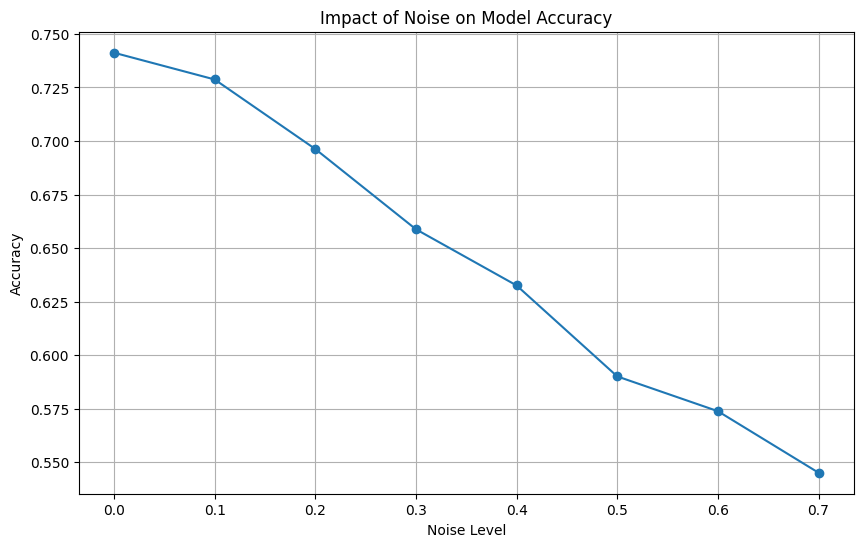

In [ ]:
def calculate_accuracy(df, noise_level):
    df_noisy = df.copy()
    df_noisy['text'] = df_noisy['text'].apply(lambda x: replace_with_homoglyphs(x, noise_level))

    data = df_noisy['text'].tolist()

    results = sentiment_pipeline(data)

    labels = [result['label'] for result in results]
    df_noisy['predicted_sentiment'] = [0 if result['label'] == 'NEG' else 1 for result in results]

    df_noisy['predicted_sentiment'] = df_noisy['predicted_sentiment'].astype(int)
    df_noisy['target'] = df_noisy['target'].astype(int)

    accuracy = accuracy_score(df_noisy['target'],df_noisy['predicted_sentiment'])
    return accuracy

noise_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7]

accuracy_results = {}

for noise_level in noise_levels:
    accuracy = calculate_accuracy(df_sampled, noise_level)
    accuracy_results[noise_level] = accuracy
    print(f'Noise Level: {noise_level}, Accuracy: {accuracy}')

#results
plt.figure(figsize=(10, 6))
plt.plot(accuracy_results.keys(), accuracy_results.values(), marker='o')
plt.title('Impact of Noise on Model Accuracy')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
def calculate_accuracy(df, noise_level):
    df_noisy = df.copy()
    df_noisy['text'] = df_noisy['text'].apply(lambda x: add_special_characters(x, noise_level))

    # Sample the data

    # Convert DataFrame text column to list
    data = df_noisy['text'].tolist()

    # Apply sentiment analysis pipeline to the list of texts
    results = sentiment_pipeline(data,truncation=True)

    # Extract labels and map them to binary format
    labels = [result['label'] for result in results]
    df_noisy['predicted_sentiment'] = [0 if result['label'] == 'NEG' else 1 for result in results]

    # Ensure the columns are integer type for accuracy calculation
    df_noisy['predicted_sentiment'] = df_noisy['predicted_sentiment'].astype(int)
    df_noisy['target'] = df_noisy['target'].astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(df_noisy['target'],df_noisy['predicted_sentiment'])
    return accuracy

# List of noise levels to evaluate
noise_levels = [0.0, 0.1, 0.2, 0.3, 0.5,0.6,0.7]

# Dictionary to store accuracy results
accuracy_results = {}

# Calculate accuracy for each noise level
for noise_level in noise_levels:
    accuracy = calculate_accuracy(df_sampled, noise_level)
    accuracy_results[noise_level] = accuracy
    print(f'Noise Level: {noise_level}, Accuracy: {accuracy}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(accuracy_results.keys(), accuracy_results.values(), marker='o')
plt.title('Impact of Noise on Model Accuracy')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Noise Level: 0.0, Accuracy: 0.74125
Noise Level: 0.1, Accuracy: 0.7275
Noise Level: 0.2, Accuracy: 0.7075


KeyboardInterrupt: 

In [ ]:
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming replace_with_homoglyphs and add_special_characters are already defined

# define the calculate_accuracy function for homoglyph noise
def calculate_accuracy_randomchar(df, noise_level):
    df_noisy = df.copy()
    df_noisy['text'] = df_noisy['text'].apply(lambda x: replace_with_random_chars(x, noise_level))


    data = df_noisy['text'].tolist()
    results = sentiment_pipeline(data)

    labels = [result['label'] for result in results]
    df_noisy['predicted_sentiment'] = [0 if result['label'] == 'NEG' else 1 for result in results]

    df_noisy['predicted_sentiment'] = df_noisy['predicted_sentiment'].astype(int)
    df_noisy['target'] = df_noisy['target'].astype(int)

    accuracy = accuracy_score(df_noisy['target'], df_noisy['predicted_sentiment'])
    return accuracy

def calculate_accuracy_homoglyph(df, noise_level):
    df_noisy = df.copy()
    df_noisy['text'] = df_noisy['text'].apply(lambda x: replace_with_homoglyphs(x, noise_level))

    data = df_noisy['text'].tolist()

    results = sentiment_pipeline(data)

    labels = [result['label'] for result in results]
    df_noisy['predicted_sentiment'] = [0 if result['label'] == 'NEG' else 1 for result in results]

    df_noisy['predicted_sentiment'] = df_noisy['predicted_sentiment'].astype(int)
    df_noisy['target'] = df_noisy['target'].astype(int)

    accuracy = accuracy_score(df_noisy['target'], df_noisy['predicted_sentiment'])
    return accuracy


# define the calculate_accuracy function for special characters noise
def calculate_accuracy_special_characters(df, noise_level):
    df_noisy = df.copy()
    df_noisy['text'] = df_noisy['text'].apply(lambda x: add_special_characters(x, noise_level))


    data = df_noisy['text'].tolist()

    results = sentiment_pipeline(data, truncation=True)

    labels = [result['label'] for result in results]
    df_noisy['predicted_sentiment'] = [0 if result['label'] == 'NEG' else 1 for result in results]

    df_noisy['predicted_sentiment'] = df_noisy['predicted_sentiment'].astype(int)
    df_noisy['target'] = df_noisy['target'].astype(int)

    accuracy = accuracy_score(df_noisy['target'], df_noisy['predicted_sentiment'])
    return accuracy

# List of noise levels to evaluate
noise_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Dictionary to store accuracy results for both noise types
accuracy_results_homoglyph = {}
accuracy_results_special_chars = {}
accuracy_results_randomchar = {}

# Calculate accuracy for each noise level for homoglyph noise
for noise_level in noise_levels:
    accuracy = calculate_accuracy_homoglyph(df_sampled, noise_level)
    accuracy_results_homoglyph[noise_level] = accuracy
    print(f'Homoglyph Noise - Noise Level: {noise_level}, Accuracy: {accuracy}')




Homoglyph Noise - Noise Level: 0.0, Accuracy: 0.74125
Homoglyph Noise - Noise Level: 0.1, Accuracy: 0.71125
Homoglyph Noise - Noise Level: 0.2, Accuracy: 0.695
Homoglyph Noise - Noise Level: 0.3, Accuracy: 0.64125
Homoglyph Noise - Noise Level: 0.4, Accuracy: 0.6275
Homoglyph Noise - Noise Level: 0.5, Accuracy: 0.60875
Homoglyph Noise - Noise Level: 0.6, Accuracy: 0.57875
Homoglyph Noise - Noise Level: 0.7, Accuracy: 0.55625
Special Characters Noise - Noise Level: 0.0, Accuracy: 0.74125
Special Characters Noise - Noise Level: 0.1, Accuracy: 0.725
Special Characters Noise - Noise Level: 0.2, Accuracy: 0.7125
Special Characters Noise - Noise Level: 0.3, Accuracy: 0.685
Special Characters Noise - Noise Level: 0.4, Accuracy: 0.65875
Special Characters Noise - Noise Level: 0.5, Accuracy: 0.62625
Special Characters Noise - Noise Level: 0.7, Accuracy: 0.6175


TypeError: 'function' object does not support item assignment

In [ ]:
for noise_level in noise_levels:
    accuracy = calculate_accuracy_special_characters(df_sampled, noise_level)
    accuracy_results_special_chars[noise_level] = accuracy
    print(f'Special Characters Noise - Noise Level: {noise_level}, Accuracy: {accuracy}')

In [ ]:
for noise_level in noise_levels:
    accuracy = calculate_accuracy_randomchar(df_sampled, noise_level)
    accuracy_results_randomchar[noise_level] = accuracy
    print(f'Random Characters Noise - Noise Level: {noise_level}, Accuracy: {accuracy}')


Random Characters Noise - Noise Level: 0.0, Accuracy: 0.74125
Random Characters Noise - Noise Level: 0.1, Accuracy: 0.69
Random Characters Noise - Noise Level: 0.2, Accuracy: 0.6225
Random Characters Noise - Noise Level: 0.3, Accuracy: 0.59125
Random Characters Noise - Noise Level: 0.4, Accuracy: 0.55
Random Characters Noise - Noise Level: 0.5, Accuracy: 0.53
Random Characters Noise - Noise Level: 0.6, Accuracy: 0.5125
Random Characters Noise - Noise Level: 0.7, Accuracy: 0.5075


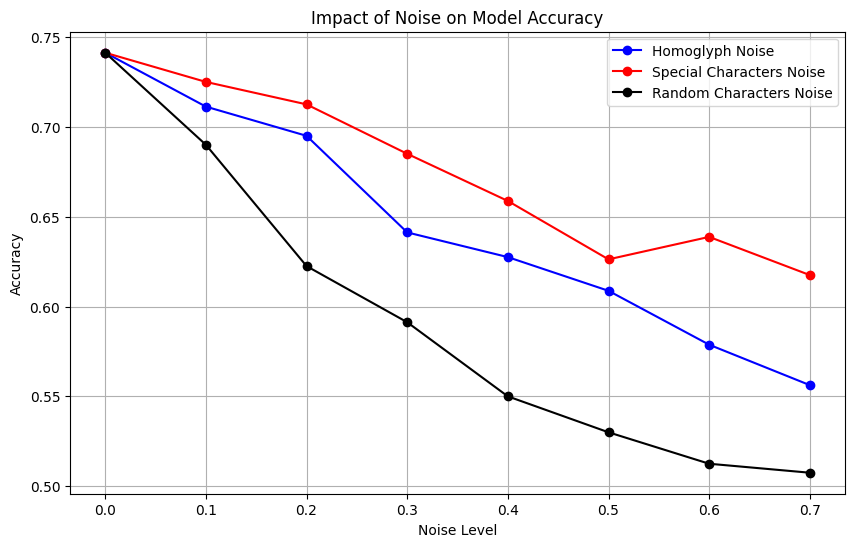

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(accuracy_results_homoglyph.keys(), accuracy_results_homoglyph.values(), marker='o', color='blue', label='Homoglyph Noise')
plt.plot(accuracy_results_special_chars.keys(), accuracy_results_special_chars.values(), marker='o', color='red', label='Special Characters Noise')
plt.plot(accuracy_results_randomchar.keys(), accuracy_results_randomchar.values(), marker='o', color='black', label='Random Characters Noise')
plt.title('Impact of Noise on Model Accuracy')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()